# 1. Data Loading.

In [1]:
# Lets import the Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# First lets import the data and turn it into a Pandas Dataframe.

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 2. Data Pre-Processing.

In [181]:
# To check the Dimension of the data.
df.shape

(200, 5)

In [182]:
# To Check if there are any missing or NULL values in the data.
df.isnull().sum()

CustomerID            0
Gender                0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [183]:
# To check if there are any duplicate values in the data.
df.duplicated().sum()

0

# As you can see the data doesn't have any Missing Values/Null Values or any Duplicates so we don't need to clean the data

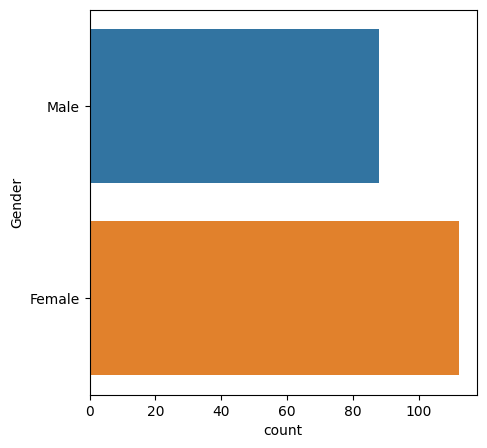

In [184]:
# The Gender Ratio of the customers.
plt.figure(1, figsize = (5,5))
sns.countplot(y = 'Gender', data = df, hue = 'Gender')
plt.show()

# 3. Data-Mining Algorithm.

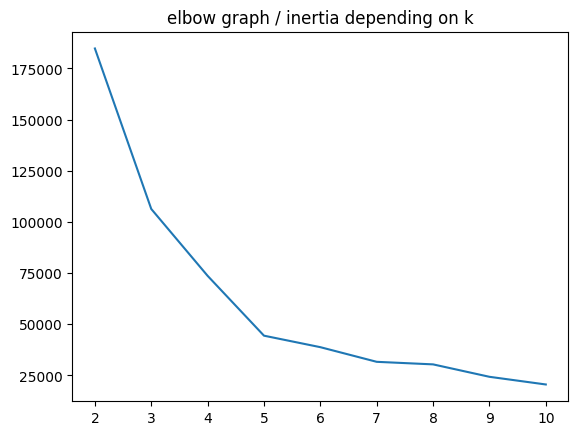

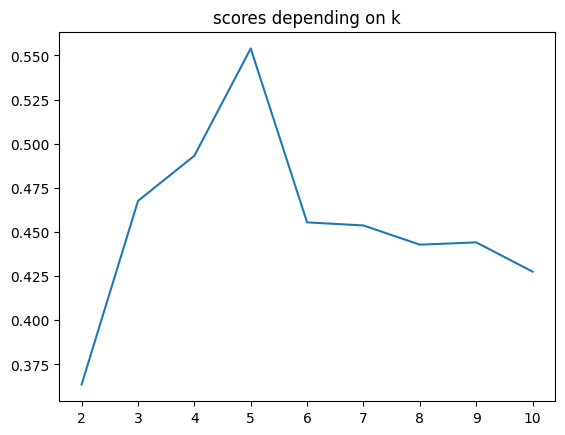

In [185]:
# To find the K in K-Means we will use the Elbow Method.

'''
    > There is only 3 fields on which we can apply K-Means on ( because other fields are not suitable for K-Means like customerID and gender ).
    > First we will Apply it on any 2 fields first to see the pattern for the value of K.
'''

X = df.iloc[:, -2:]

km_inertias, km_scores = [], []

for k in range(2, 11):
    km = KMeans(n_clusters = k).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))

# Graph of Inertia.
sns.lineplot(x = range(2, 11), y = km_inertias)
plt.title('elbow graph / inertia depending on k')
plt.show()

# Graph of Scores.
sns.lineplot(x = range(2, 11), y = km_scores)
plt.title('scores depending on k')
plt.show()

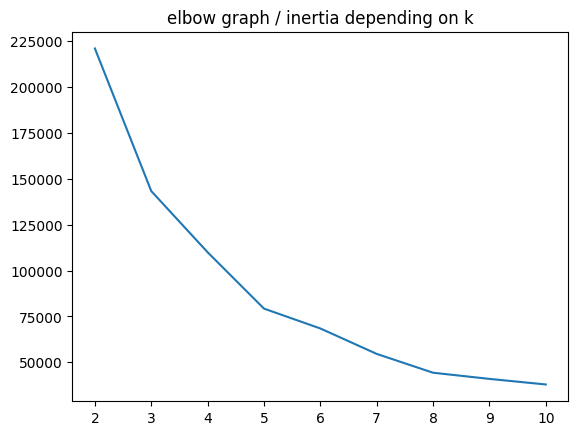

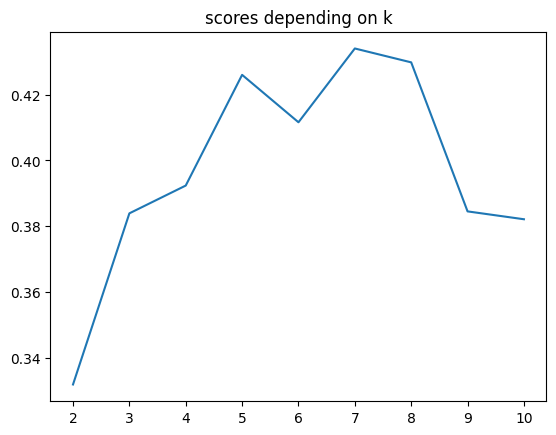

In [186]:
# Now we will try it on 3 fields to get the value for K.
X = df.iloc[:, -3:]

km_inertias, km_scores = [], []

for k in range(2, 11):
    km = KMeans(n_clusters = k).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))

# Graph of Inertia.    
sns.lineplot(x = range(2, 11), y = km_inertias)
plt.title('elbow graph / inertia depending on k')
plt.show()

# Graph of Scores
sns.lineplot(x = range(2, 11), y = km_scores)
plt.title('scores depending on k')
plt.show()

In [213]:
# Judging from the graph above we can conclude the value of K to be between 5-6.
# In this case we will chose 5.

km = KMeans(n_clusters = 5, init = 'k-means++').fit(X)

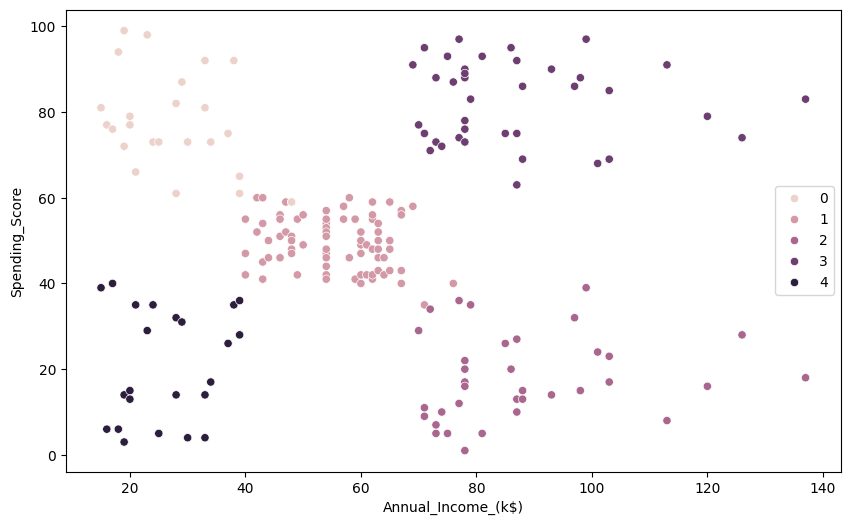

In [214]:
# K-Means visualization on Spending Score (y), and Annual Income (x).

X = df.iloc[:, -3:]

plt.figure(figsize = (10, 6))
sns.scatterplot(data = X, x = X.iloc[:, 1], y = X.iloc[:, 2], hue = km.labels_)
plt.show()

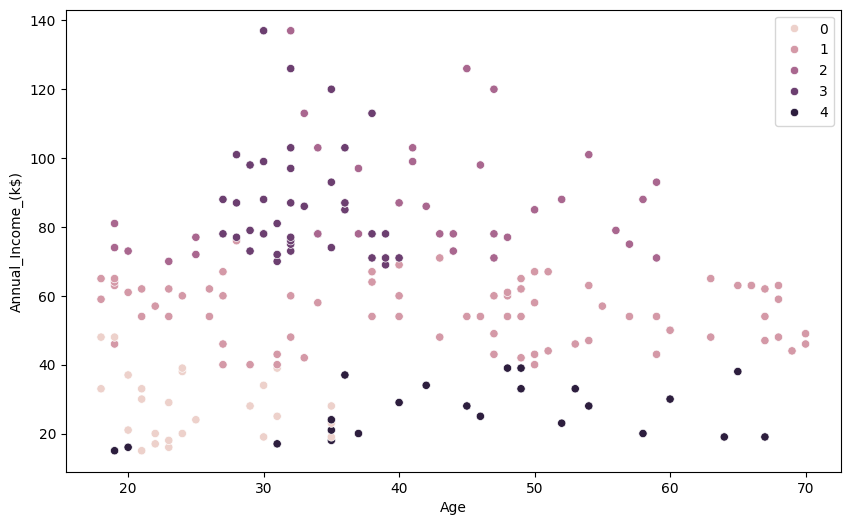

In [215]:
# K-Means visualization on Annual Income (y), and Age (x).

plt.figure(figsize = (10, 6))
sns.scatterplot(x = X.iloc[:, 0], y = X.iloc[:, 1], hue = km.labels_)
plt.show()

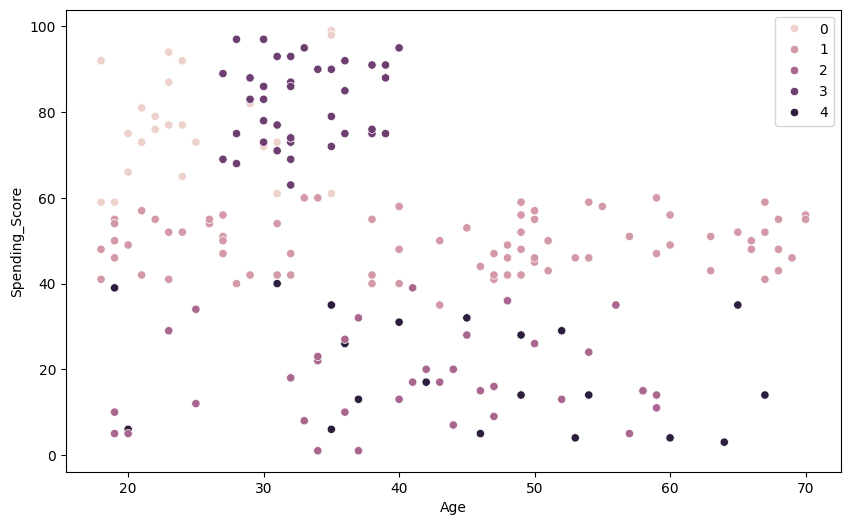

In [216]:
# K-Means visualization on Spending Score (y), and Age (x).
plt.figure(figsize = (10, 6))
sns.scatterplot(x = X.iloc[:, 0], y = X.iloc[:, 2], hue = km.labels_)
plt.show()

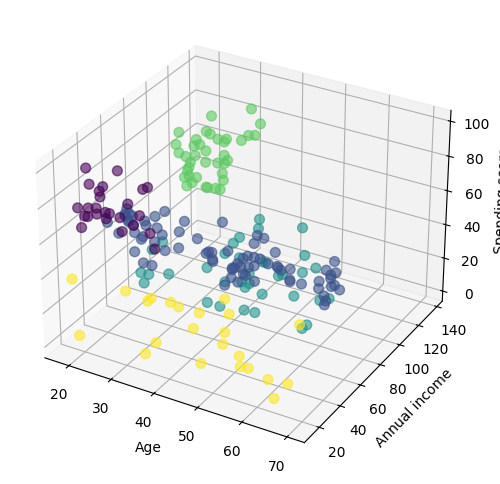

In [217]:
# K-Means Visualization on Age (x), Annual Income (y), and Spending Score (z) on a 3D Scatter Plot.

from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(projection = '3d')

xs = X.iloc[:, 0]
ys = X.iloc[:, 1]
zs = X.iloc[:, 2]

ax.scatter(xs = xs, ys = ys, zs = zs, s = 50, alpha = 0.6, c = km.labels_)

ax.set_xlabel('Age')
ax.set_ylabel('Annual income')
ax.set_zlabel('Spending score')


plt.show()

This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are clearly 5 segments of Customers based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall.

# Customer Information Corresponding to each Cluster.

In [218]:
# Total Customers in each Cluster.

X['label'] = km.labels_
X.label.value_counts()

label
1    77
3    39
2    36
0    25
4    23
Name: count, dtype: int64

In [219]:
# Count, Mean, Min and Max of each Cluster.

for k in range(5):
    print(f'cluster : {k + 1}')
    print(X[X.label == k].describe().iloc[[0, 1, 3, 7], :-1]) # we only want count, mean, min and max so we are using iloc to get only those rows.
    print('\n\n')

cluster : 1
         Age  Annual_Income_(k$)  Spending_Score
count  25.00               25.00            25.0
mean   24.96               28.04            77.0
min    18.00               15.00            59.0
max    35.00               48.00            99.0



cluster : 2
             Age  Annual_Income_(k$)  Spending_Score
count  77.000000           77.000000       77.000000
mean   43.727273           55.480519       49.324675
min    18.000000           40.000000       35.000000
max    70.000000           76.000000       60.000000



cluster : 3
             Age  Annual_Income_(k$)  Spending_Score
count  36.000000               36.00       36.000000
mean   40.666667               87.75       17.583333
min    19.000000               70.00        1.000000
max    59.000000              137.00       39.000000



cluster : 4
             Age  Annual_Income_(k$)  Spending_Score
count  39.000000           39.000000       39.000000
mean   32.692308           86.538462       82.128205
min    27

The generated "Clusters of Customers" plot shows the Distribution of the 5 Clusters. From the data we can conclude that:

Cluster 1 : Customers with low annual income but high annual spend.<br>
Cluster 2 : Customers with medium annual income and medium annual spend.<br>
Cluster 3 : Customers with high annual income but low annual spend.<br>
Cluster 4 : Customers with high annual income and high annual spend.<br>
Cluster 5 : Customers with low annual income and low annual spend.<br>

# Gender Ratio in each Cluster

In [220]:
# Lets merge the orignal data set with the dataframe that has the label and store Gender and Label in a different dataframe.

df2 = pd.DataFrame()

Y = df.merge(X, how = 'left', on = ['Age', 'Annual_Income_(k$)', 'Spending_Score'])

df2['Gender'], df2['Cluster'] = Y['Gender'], Y['label'] 
df2.head()

,Gender,Cluster
0,Male,4
1,Male,0
2,Female,4
3,Female,0
4,Female,4


<Axes: xlabel='Cluster', ylabel='count'>

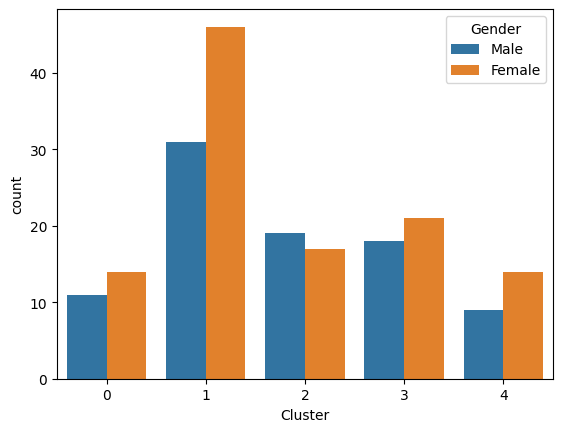

In [221]:
# Graph showing Gender Ratio in different Clusters.

sns.countplot(df2, hue = "Gender", x = "Cluster")

The Generated "Gender Ratio in Cluster" plot shows the distribution of Gender in the Clusters. From the data we can conclude: 

Cluster 1 : Customers with low annual income but high annual spend | The amount of female customer is slightly more in this cluster.<br>
Cluster 2 : Customers with medium annual income and medium annual spend | The amount of female customer is more in this cluster.<br>
Cluster 3 : Customers with high annual income but low annual spend | The amount of male customer is slightly more in this cluster.<br>
Cluster 4 : Customers with high annual income and high annual spend | The amount of female customer is slightly more in this cluster.<br>
Cluster 5 : Customers with low annual income and low annual spend | The amount of female customer is more in this cluster.<br>

Having a better understanding of the customers segments, a company could make better and more informed decisions. An example, there are customers with high annual income but low spending score. A more strategic and targeted marketing approach could lift their interest and make them become higher spenders. The focus should also be on the "loyal" customers to maintain their satisfaction and to target female customer as they are population is more than male customers in high annual spend clusters.